##  1. Importing Libraries


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


## 2.Load and Prepare Data


In [10]:
data = pd.read_csv('Student Depression Dataset.csv')

data = data.head(500)

features = ['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
            'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress',
            'Family History of Mental Illness', 'Job Satisfaction', 'Work Pressure']
X = data[features].dropna()  # Remove rows with missing values
y = data.loc[X.index, 'Depression']  # Synchronize target variable

X = pd.get_dummies(X, drop_first=True)  # Encode categorical features


## 3. Split and Scale Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 4. Train and Evaluate Model

In [12]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Test Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.84      0.91      0.87        56

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.85      0.85      0.85       100



## 5. Visualize ROC Curve

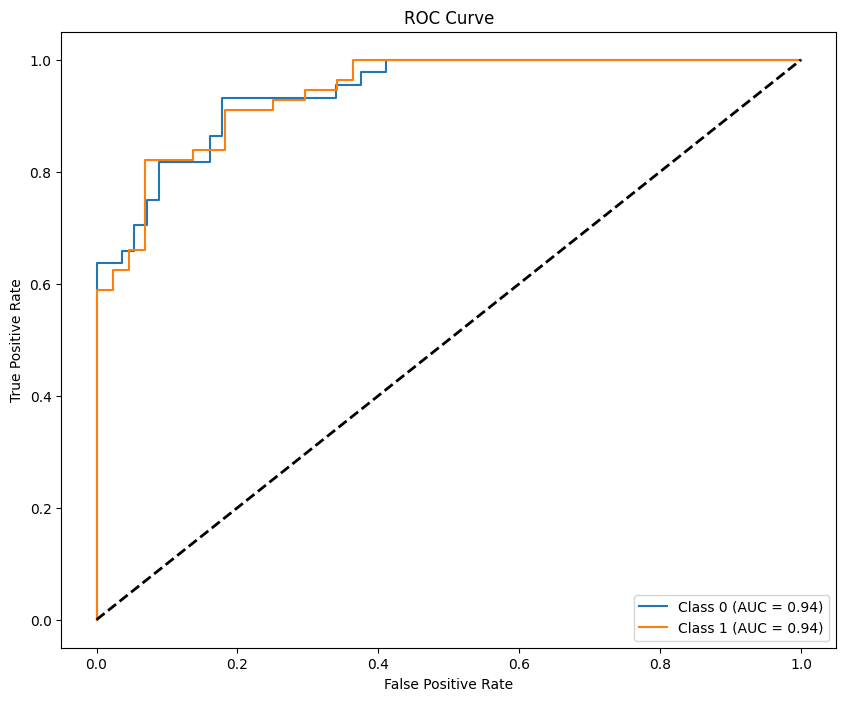

In [13]:
y_prob = model.predict_proba(X_test)
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## 6. Decision Boundary Visualization

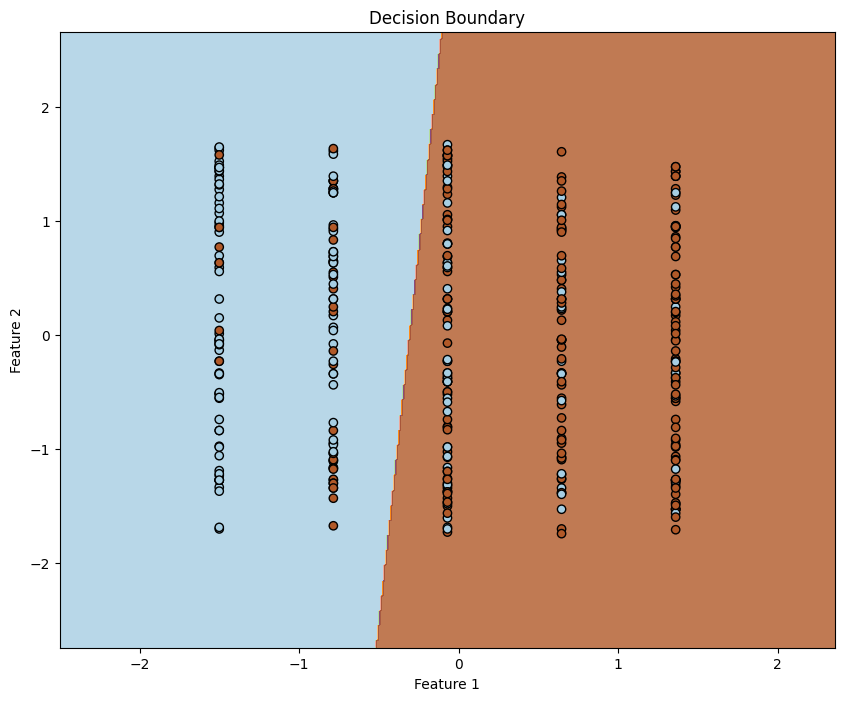

In [14]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

if X_train.shape[1] > 2:
    X_train_2d = X_train[:, :2]
    model_2d = LogisticRegression(max_iter=1000, random_state=42)
    model_2d.fit(X_train_2d, y_train)
    plot_decision_boundary(X_train_2d, y_train, model_2d)
